# Multiple Linear Regression - Bike Share

In this notebook, you will use data from a bike sharing company to help predict the count of bikes rented on a given day. The columns of the data are as follows:

1. season: 1=winter, 2=spring, 3=summer, 4=fall
2. month: 1=January - 12=December
3. weekday: 0=Sunday - 6=Saturday
4. temperature: in degrees Celsius
5. humidity: Percentage
6. windspeed: kph
7. casual: the number of bikes rented for casual use
8. registered: the number of registered users renting a bike
9. count: the total number of bikes rented

## 1. Library Imports and Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("data/bike_share.csv")

## 2. Determine if we can use Multiple Linear Regression
* Data must be quantitative
* Data must have a linear relationship
* Residuals must be normally distributed
* There should be no meaningful correlation between independent variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    int64  
 1   month        730 non-null    int64  
 2   weekday      730 non-null    int64  
 3   temperature  730 non-null    float64
 4   humidity     730 non-null    float64
 5   windspeed    730 non-null    float64
 6   casual       730 non-null    int64  
 7   registered   730 non-null    int64  
 8   count        730 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 51.5 KB


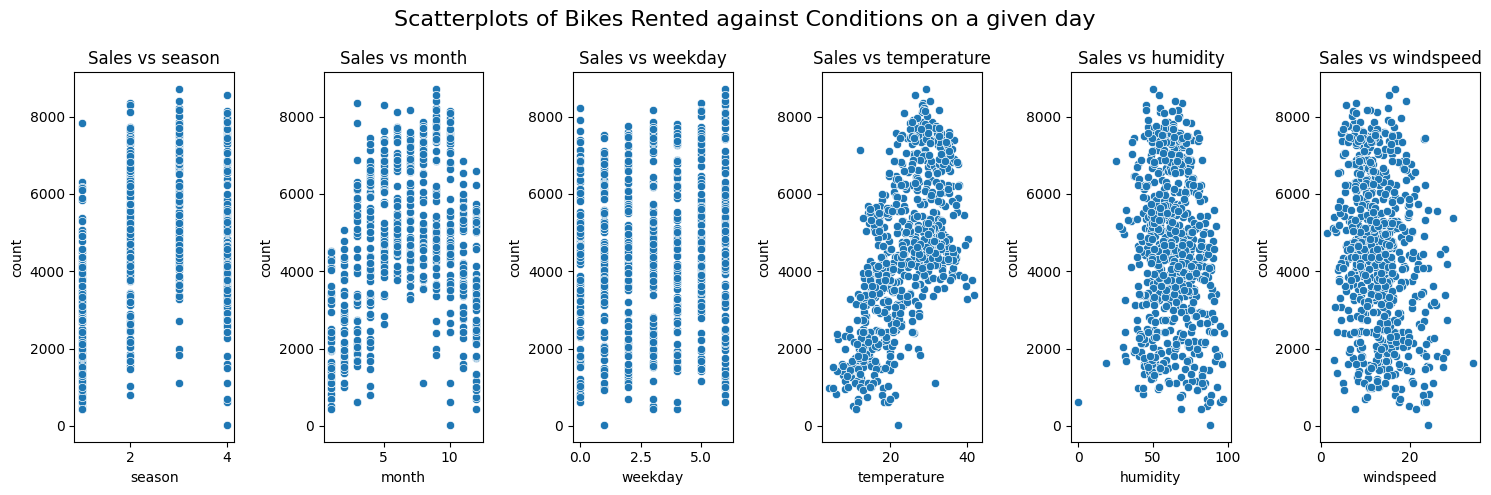

In [20]:
# Make sure the relationship looks linear
possible_features = ["season", "month", "weekday", "temperature", "humidity", "windspeed"]

# Create 3 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=1, ncols=len(possible_features), figsize=(15, 5), sharey=False)
# Loop through 
for index, feature in enumerate(possible_features):
    sns.scatterplot(data=df, x=feature, y="count", ax=axes[index])
    axes[index].set_title(f'Sales vs {feature}')

fig.suptitle("Scatterplots of Bikes Rented against Conditions on a given day", fontsize=16)
fig.tight_layout()

## 3. Feature Selection

<Axes: >

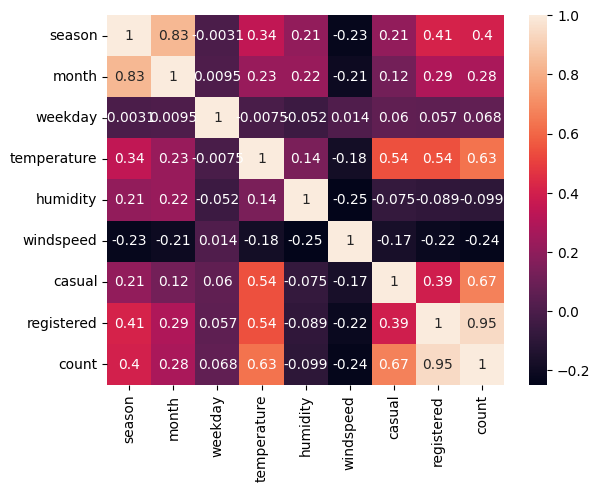

In [21]:
numeric = df.select_dtypes("number")
cor = numeric.corr()
sns.heatmap(cor, annot=True)

In [23]:
# Create the model with everything first
features = ["season", "month", "weekday", "temperature", "humidity", "windspeed"]
y_train = df["count"]
X_train = df[features]
model = LinearRegression()
best_score = 0
best_feature = None
selected_features = []
length = len(features)
for i in range(length):
    best_score = 0
    best_feature = None
    for feature in features:
        X_train = df[[feature] + selected_features]
        model = model.fit(X_train, y_train)
        # Evaluate the model
        score = model.score(X_train, y_train) 
        print("Feature:", feature, "Best Score:", best_score, "Score:", score)
        if score > best_score:
            best_score = score
            best_feature = feature
    selected_features.append(best_feature)
    features.remove(best_feature)
    print("Added: ", best_feature)
    print("Selected Features:", selected_features, "Score:", best_score)
 

Feature: season Best Score: 0 Score: 0.16368803834738543
Feature: month Best Score: 0.16368803834738543 Score: 0.07739019312212314
Feature: weekday Best Score: 0.16368803834738543 Score: 0.004560849715568804
Feature: temperature Best Score: 0.16368803834738543 Score: 0.3977640093840986
Feature: humidity Best Score: 0.3977640093840986 Score: 0.009710699025747616
Feature: windspeed Best Score: 0.3977640093840986 Score: 0.05528729027124957
Added:  temperature
Selected Features: ['temperature'] Score: 0.3977640093840986
Feature: season Best Score: 0 Score: 0.4381658527301896
Feature: month Best Score: 0.4381658527301896 Score: 0.417083563213709
Feature: weekday Best Score: 0.4381658527301896 Score: 0.4029899562174831
Feature: humidity Best Score: 0.4381658527301896 Score: 0.43375059051574094
Feature: windspeed Best Score: 0.4381658527301896 Score: 0.4124610648534033
Added:  season
Selected Features: ['temperature', 'season'] Score: 0.4381658527301896
Feature: month Best Score: 0 Score: 0.4

## 4. Create Final Model based off of feature selection

In [58]:
selected_features = ["season", "weekday", "temperature", "humidity", "windspeed"]
# Extract Data
X_train = df[["season", "weekday", "temperature", "humidity", "windspeed"]]
y_train = df["count"]

# Create the model
model = LinearRegression()

# Train the model
model = model.fit(X_train, y_train)


## 5. Check Residuals

<Axes: xlabel='count', ylabel='Count'>

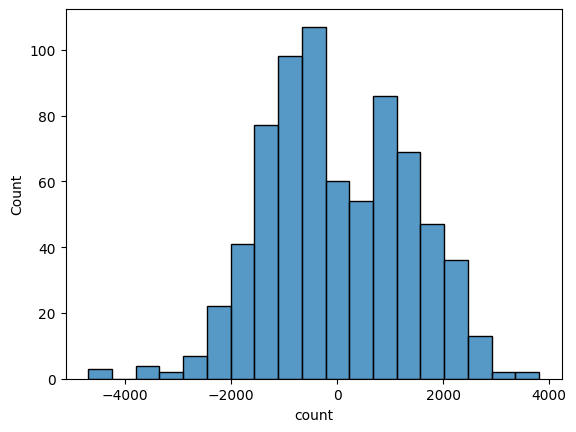

In [59]:
y_pred = model.predict(X_train)
# Calculate Residuals
residuals = y_train - y_pred

# Check the histogram of the residuals
sns.histplot(residuals)

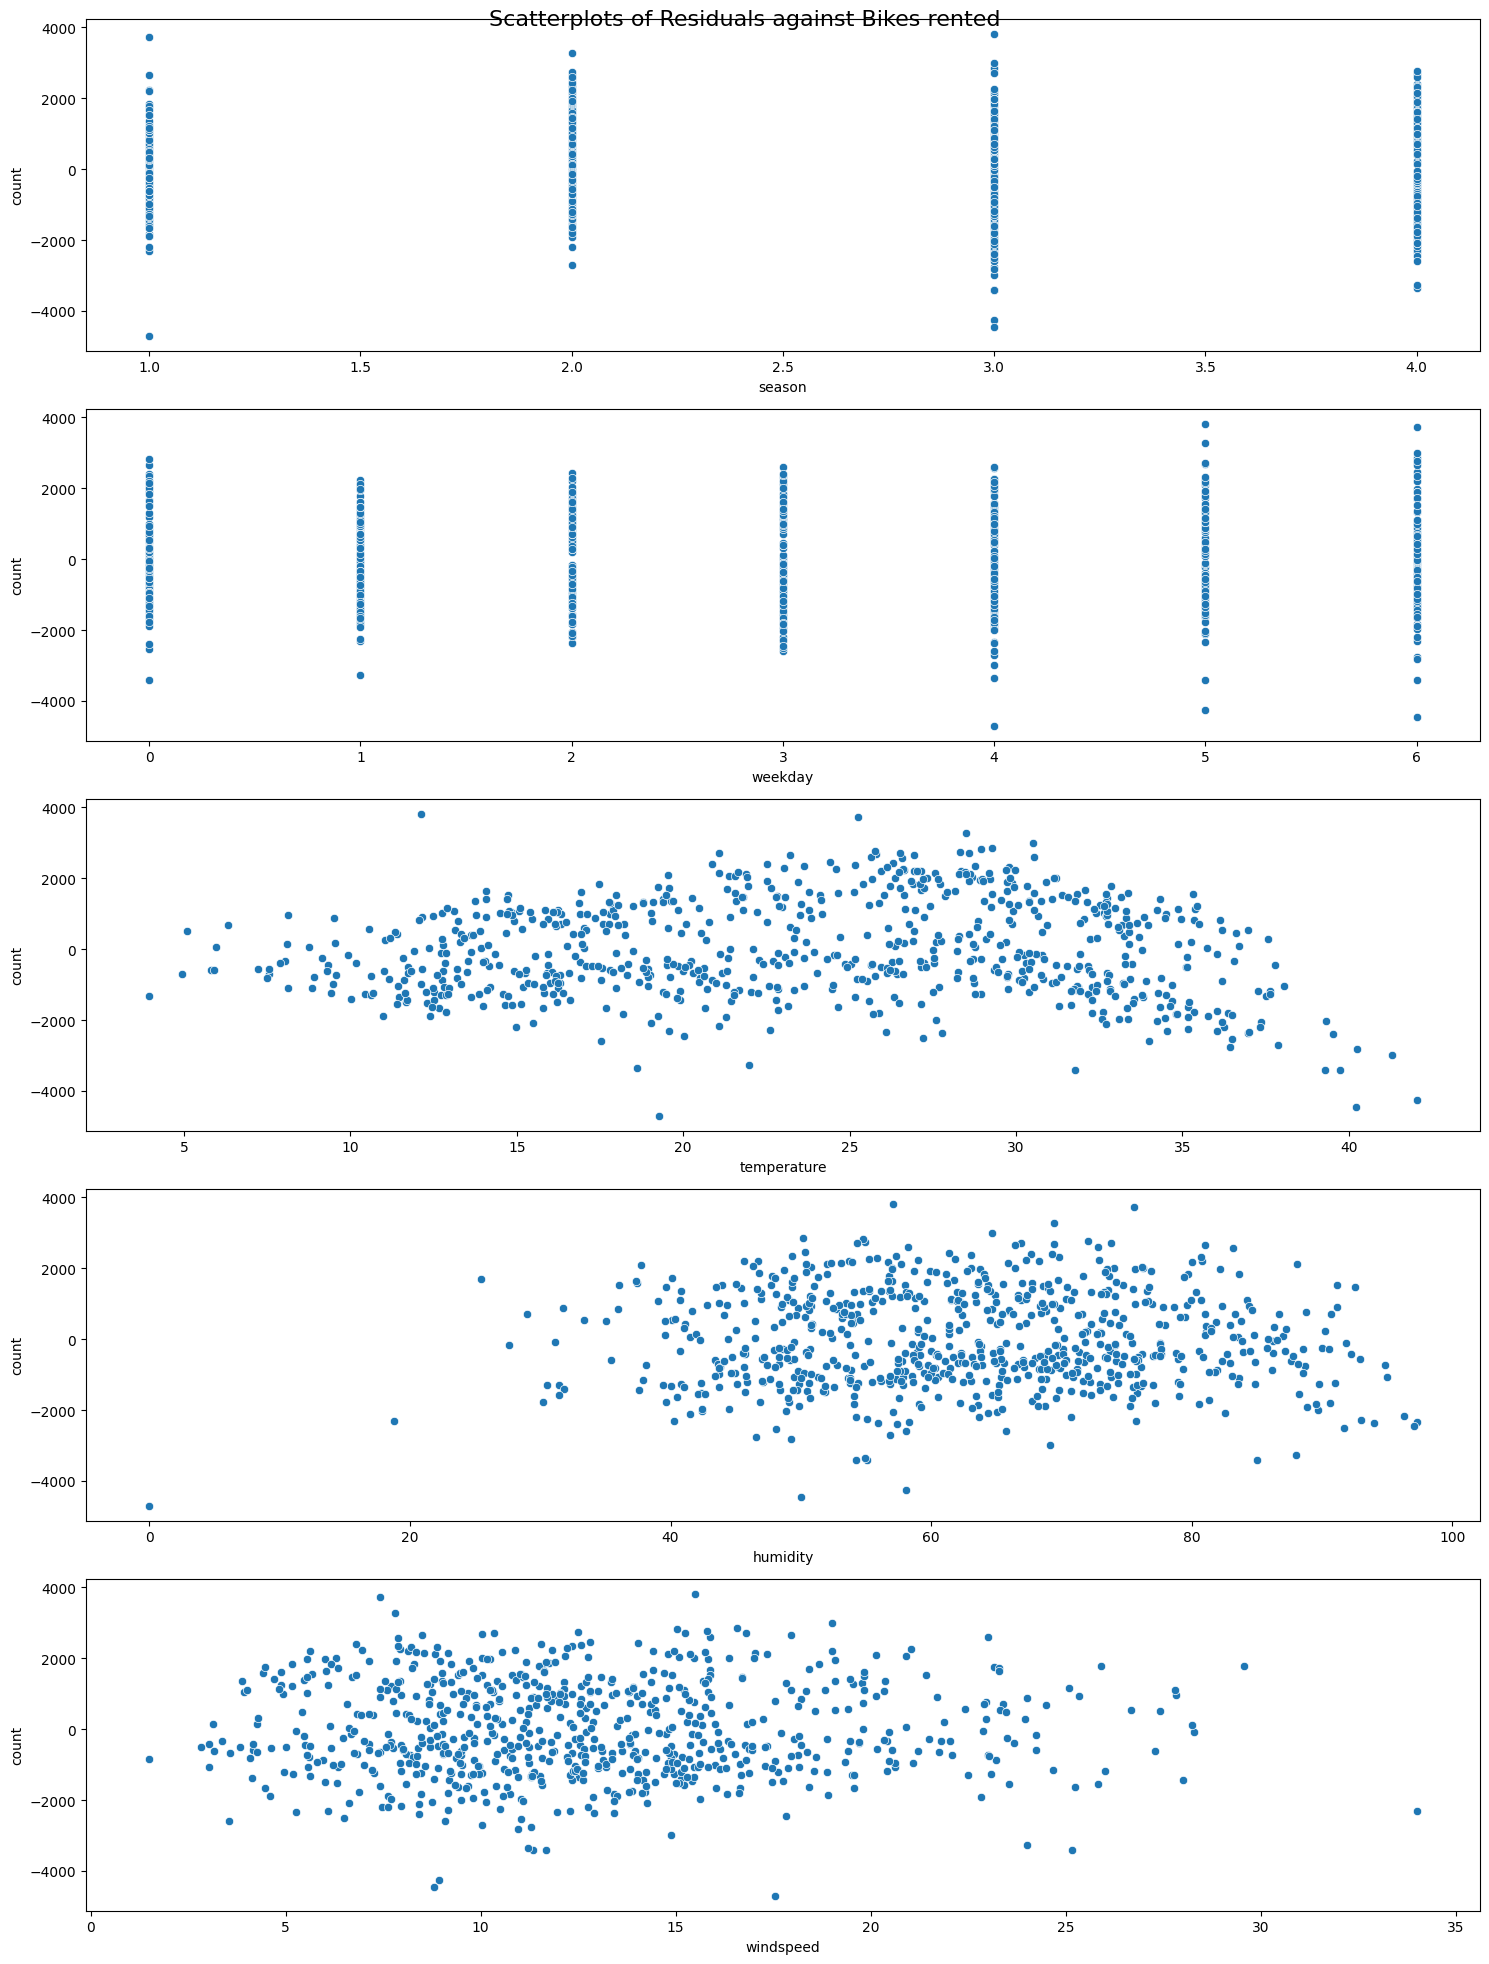

In [61]:
# Check homoscedasticity

# Create 2 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20), sharey=True)

# Plot both residuals
for index, feature in enumerate(selected_features):
    sns.scatterplot(data=df, x=feature, y=residuals, ax=axes[index])


# Add title
fig.suptitle("Scatterplots of Residuals against Bikes rented", fontsize=16)
fig.tight_layout()

## 6. Evaluate R^2

In [62]:
model.score(X_train, y_train)

0.5120858064099012